<a href="https://colab.research.google.com/github/ZakiLazuardi987/PCVK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1.	Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.**

### **2.	Berikut merupakan langkah-langkah yang dapat dilakukan:**


a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.



b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan



In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.



In [20]:

def convolution2d(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Output hasil konvolusi
    output = np.zeros((image_height, image_width))

    # Menentukan padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Menambahkan padding pada citra input
    padded_image = np.pad(image, ((pad_height, pad_width), (pad_width, pad_width)), mode='constant')

    # Melakukan operasi konvolusi
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)

    return output


d. Load citra yang akan diproses dan ubah menjadi citra keabuan



In [4]:
img = cv.imread('/content/gdrive/MyDrive/Tugas PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:


In [ ]:
kernel_sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:



In [ ]:
output_image = convolution2d(img_gray, kernel_sharpen)

# Menampilkan hasil konvolusi
plt.imshow(output_image, cmap='gray')
plt.title('Hasil Konvolusi (Sharpen)')
plt.show()

### **3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter**

# **Sharpen**

In [15]:
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

average_kernel = np.ones((3, 3), np.float32) / 9

low_pass_kernel = np.array([
    [1, 1, 1],
    [1, 4, 1],
    [1, 1, 1]
]) / 12

high_pass_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

# **Emboss**

In [6]:
emboss_kernel = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])


# **Left Sobel Edge Detection**

In [7]:
left_sobel_kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])


# **Canny Edge Detection**

In [8]:
canny_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])


# **Prewitt Edge Detection**

In [9]:
prewitt_kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])


# **5x5 Gaussian Blur**

In [10]:
gaussian_5x5_kernel = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) / 256


# **21x21 Gaussian Blur**

In [11]:
kernel_size = 21
sigma = np.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_21x21_kernel = gaussian_kernel @ gaussian_kernel.T  # Transpose untuk mendapatkan kernel 2D


Penerapan Filter Pada Citra

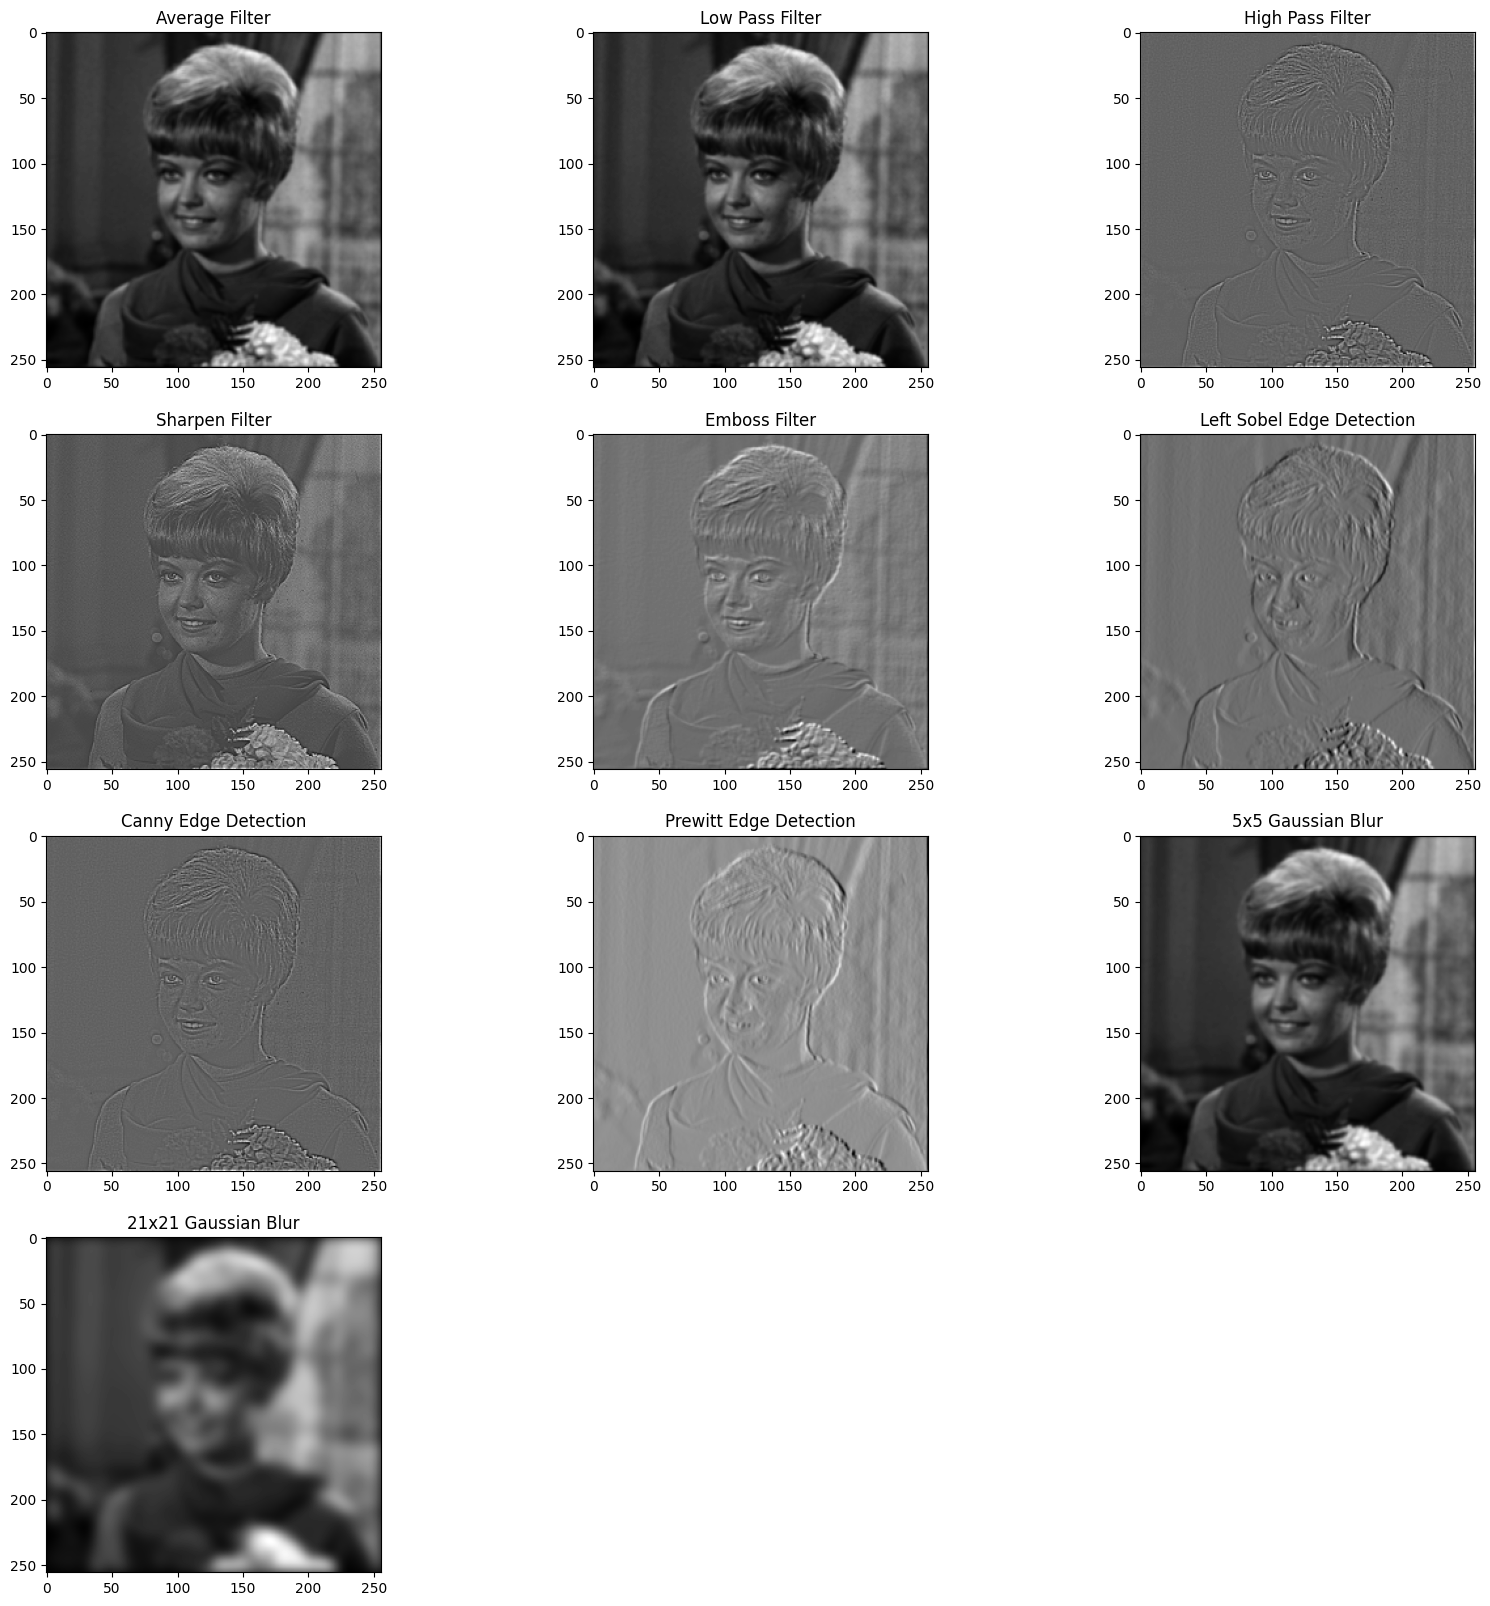

In [19]:
# Melakukan konvolusi untuk setiap filter
average_image = convolution2d(img_gray, average_kernel)
low_pass_image = convolution2d(img_gray, low_pass_kernel)
high_pass_image = convolution2d(img_gray, high_pass_kernel)
sharpened_image = convolution2d(img_gray, sharpen_kernel)
emboss_image = convolution2d(img_gray, emboss_kernel)
left_sobel_image = convolution2d(img_gray, left_sobel_kernel)
canny_image = convolution2d(img_gray, canny_kernel)
prewitt_image = convolution2d(img_gray, prewitt_kernel)
gaussian_5x5_image = convolution2d(img_gray, gaussian_5x5_kernel)
gaussian_21x21_image = convolution2d(img_gray, gauss_21x21_kernel)

# Menampilkan hasil
filters = {
    "Average Filter": average_image,
    "Low Pass Filter": low_pass_image,
    "High Pass Filter": high_pass_image,
    "Sharpen Filter": sharpened_image,
    "Emboss Filter": emboss_image,
    "Left Sobel Edge Detection": left_sobel_image,
    "Canny Edge Detection": canny_image,
    "Prewitt Edge Detection": prewitt_image,
    "5x5 Gaussian Blur": gaussian_5x5_image,
    "21x21 Gaussian Blur": gaussian_21x21_image
}

plt.figure(figsize=(20, 20))
for i, (filter_name, filter_image) in enumerate(filters.items()):
    plt.subplot(4, 3, i+1)
    plt.title(filter_name)
    plt.imshow(filter_image, cmap='gray')
plt.show()